# 1. Data Extraction

In this notebook we extract information on the training progress of the BERTSUM models from the logfiles and visualize it.

In [ ]:
import os
import re
import pandas as pd
import glob

In [ ]:
# Retrieve step details from text file

# Create a list to collect the dictionaries that hold the details of each step interval
step_details = []

with open(r"new_mix_log.txt", "r") as f:
  fh = f.read()
  match = re.findall("Step.*", fh)
  c = 50
  for item in match:
    #print("Adding details of Step {}...".format(c))
    # Create a dictionary to hold the details of the step interval 
    step_dict = {}
    # Find the whole line
    line = re.search(r"Step.*", item)
    # Find the step, xent, and the lr
    if line is not None:
        step = re.search(r"(\d+)", line.group())
    
        acc = re.search(r"acc:   (\d+\.\d+)", line.group())
        if acc is None:
            acc = re.search(r"acc:  (\d+\.\d+)", line.group())
    
        xent = re.search(r"xent: (\d\.\d+)", line.group())
        ppl = re.search(r"ppl: (\d+\.\d+)", line.group())
        lr = re.search(r"(\d\.\d{7})", line.group())
    else:
      step = None
      acc  = None
      xent = None
      ppl = None
      lr = None
    # Convert step, acc, xent, ppl and lr from match objects to strings 
    if step is not None:
      step = step.group()
    else:
      step = None
    step_dict['step'] = int(step)

    if acc is not None:
      acc = acc.group()
    else:
      acc = None
    step_dict['acc'] = acc
    
    if xent is not None:
      xent = xent.group()
    else:
      xent = None
    step_dict['xent'] = xent

    if ppl is not None:
      ppl = ppl.group()
    else:
      ppl = None
    step_dict['ppl'] = ppl
    
    if lr is not None:
      lr = lr.group()
    else:
      lr = None
    step_dict['lr'] = lr

    step_details.append(step_dict)
    #print("Details of Step {} added". format(c))
    c += 50

In [10]:
# Cleaning
steps_df = pd.DataFrame(step_details)

columns = ["acc","xent","ppl"]

for column in columns:
    
    for index,value in enumerate(steps_df[column]):
        
        if value is None:
            continue
        number = float(re.search(r"\d+\.\d+", value).group())
        steps_df[column].iloc[index] = number


In [15]:
# Save extracted data
#steps_df.to_csv('new_mix_log.csv', index=False)

# 2. Visualization

In [1]:
import pandas as pd
steps_df = pd.read_csv('new_abs_log.csv') 

## 2.1 Dark Design

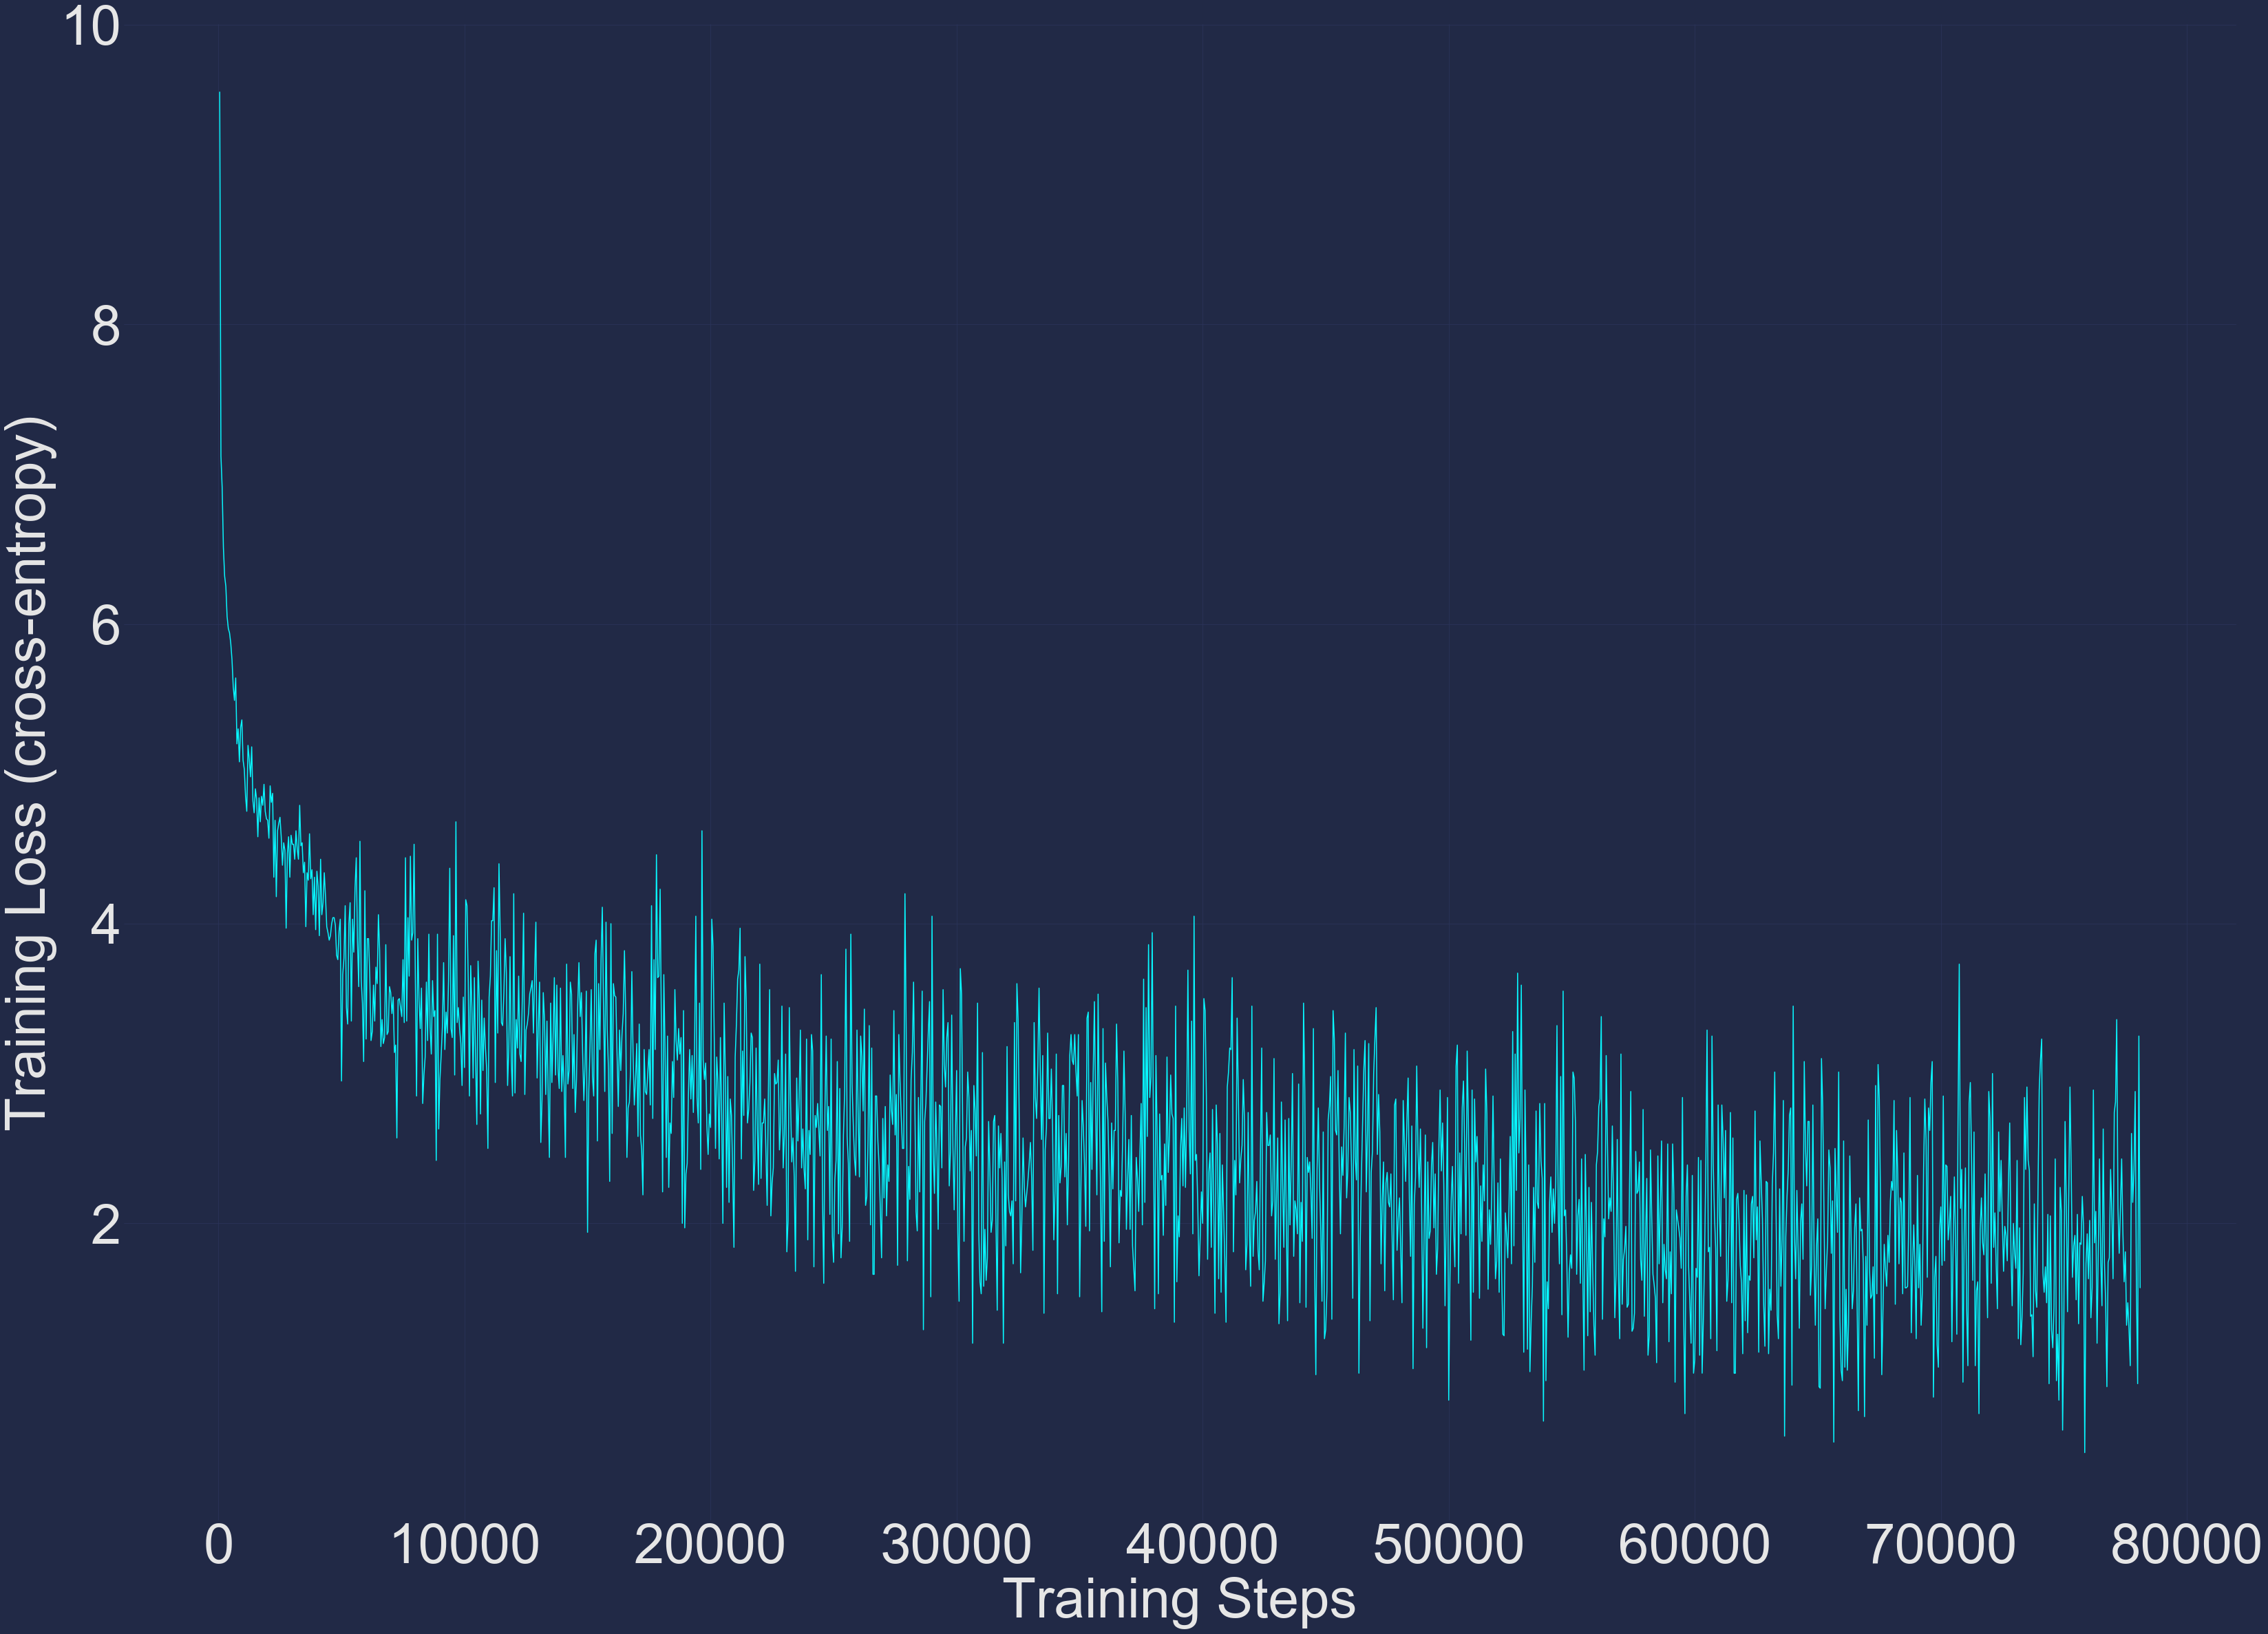

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.ticker as ticker
from numpy import arange


plt.style.use("cyberpunk")
#plt.style.use('seaborn-whitegrid')
#plt.figure(figsize=(40,30))


#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(55, 40))

x = steps_df['step']
y = steps_df['xent']
#plt.gca().invert_yaxis()
#plt.gca().axes.get_yaxis().set_ticks([])

#fig.suptitle("Training Steps vs. Loss Decay for BERT Extractive Model", fontsize = 70)
plt.xlabel("Training Steps", fontsize = 80)
plt.ylabel("Training Loss (cross-entropy)", fontsize = 80)
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)
#plt.ylim(top=8) 

#ymarks=[i for i in arange(6,0.1,-0.1)]
#plt.yticks(ymarks)


ax.plot(x, y);
plt.savefig('abs_NEW_2.png', dpi=300)

#mplcyberpunk.make_lines_glow(ax)
plt.show()

# 2.2 Light Design

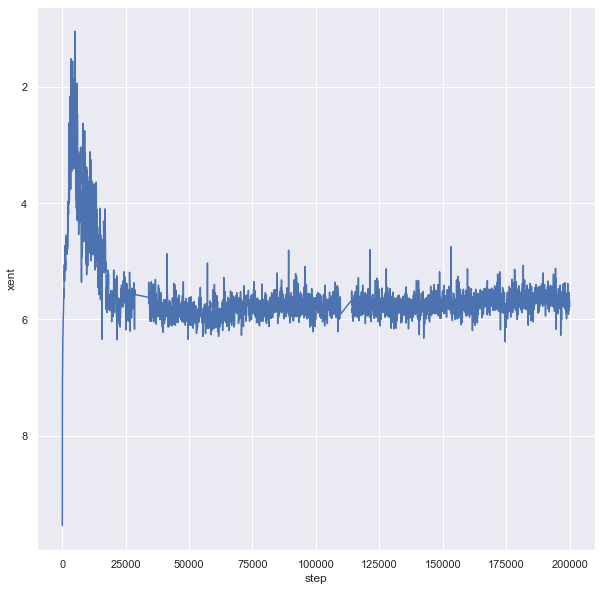

In [39]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

fig_dims = (10, 10)

fig, ax = plt.subplots(figsize=fig_dims)
fig.gca().invert_yaxis()

sns.lineplot(x="step", y="xent", ax=ax, data=steps_df)

fig.savefig('abstractive_light.png')